# **Experiment Notebook**



In [158]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [159]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [161]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [162]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [163]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [164]:
business_use_case_description = """The objective of this project is to develop a robust machine learning model capable of accurately predicting the cumulative volume of precipitation, measured in millimetres, over a three-day forecast period for Sydney, Australia. The model will be trained on an extensive dataset comprising daily historical weather observations spanning from 2010 to 2024. Several regression algorithms will be implemented and rigorously evaluated to identify the most effective predictive approach. Model performance will be assessed using appropriate statistical metrics, with the best-performing model selected for deployment as an API service. This forecasting tool aims to provide end users with timely and reliable precipitation predictions, thereby facilitating data-driven decision-making in sectors that are highly sensitive to weather variability, including agriculture, logistics and event management. By integrating machine learning-based precipitation forecasting into its service infrastructure, the project will enhance the predictive capabilities and overall value proposition of the Open Meteo platform."""

In [165]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [166]:
business_objectives = """An accurate regression model for predicting rainfall volume offers significant benefits to a broad range of stakeholders. Reliable forecasts enable more effective planning and resource allocation, particularly in weather-sensitive sectors, by helping to minimise operational disruptions, reduce unnecessary expenditures, and enhance worker safety. The ability to quantify the intensity of precipitation, from light drizzles to heavy downpours, further supports more informed and context-specific decision-making. This allows organisations to adjust their responses appropriately and avoid both overpreparation and underpreparation. Moreover, precise rainfall predictions contribute to greater public awareness and readiness, especially in situations involving sudden or severe weather events. Conversely, inaccurate forecasts can result in substantial negative consequences. Overestimations may lead to avoidable delays and financial losses, while underestimations can compromise safety and limit the effectiveness of proactive measures."""

In [167]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [168]:
stakeholders_expectations_explanations = """Predictions of precipitation volume will play a critical role in supporting informed decision-making across a variety of contexts. Whether the forecast indicates light drizzle or heavy rainfall, individuals and stakeholder organisations can adjust their plans accordingly. While light rain may have minimal impact, heavy rainfall can lead to significant disruptions if not anticipated and managed proactively. For instance, individuals can use the forecasts to plan their weekends and outdoor activities, while event planners and project managers can schedule or adjust tasks to minimise weather-related interruptions. Weather-dependent industries such as agriculture, logistics and event management will benefit from these predictions by optimising operations, reducing risks, and improving safety through the avoidance of outdoor work during adverse weather conditions. The users of these forecasts include the general public, industry professionals, event organisers, and others whose activities are influenced by weather variability. Ultimately, accurate precipitation forecasts will positively impact a broad range of stakeholders by enabling better planning, reducing financial losses, minimising disruptions, and enhancing overall safety."""

In [169]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [170]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.8678,
	"longitude": 151.2073,
	"start_date": "2010-01-01",
	"end_date": "2024-12-31",
	"daily": ["relative_humidity_2m_mean", "cloud_cover_mean", "cloud_cover_max", "cloud_cover_min", "wind_gusts_10m_mean", "wind_speed_10m_mean", "wet_bulb_temperature_2m_mean", "pressure_msl_mean", "vapour_pressure_deficit_max", "shortwave_radiation_sum", "temperature_2m_max", "temperature_2m_min", "precipitation_hours", "temperature_2m_mean", "wind_gusts_10m_max", "wind_speed_10m_max", "wind_direction_10m_dominant", "et0_fao_evapotranspiration", "rain_sum", "dew_point_2m_mean", "soil_moisture_0_to_100cm_mean", "soil_temperature_0_to_100cm_mean"],
	"timezone": "auto",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone: {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_relative_humidity_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_cloud_cover_mean = daily.Variables(1).ValuesAsNumpy()
daily_cloud_cover_max = daily.Variables(2).ValuesAsNumpy()
daily_cloud_cover_min = daily.Variables(3).ValuesAsNumpy()
daily_wind_gusts_10m_mean = daily.Variables(4).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(5).ValuesAsNumpy()
daily_wet_bulb_temperature_2m_mean = daily.Variables(6).ValuesAsNumpy()
daily_pressure_msl_mean = daily.Variables(7).ValuesAsNumpy()
daily_vapour_pressure_deficit_max = daily.Variables(8).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(9).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(10).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(11).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(12).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(13).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(14).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(16).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(17).ValuesAsNumpy()
daily_rain_sum = daily.Variables(18).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(19).ValuesAsNumpy()
daily_soil_moisture_0_to_100cm_mean = daily.Variables(20).ValuesAsNumpy()
daily_soil_temperature_0_to_100cm_mean = daily.Variables(21).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["cloud_cover_mean"] = daily_cloud_cover_mean
daily_data["cloud_cover_max"] = daily_cloud_cover_max
daily_data["cloud_cover_min"] = daily_cloud_cover_min
daily_data["wind_gusts_10m_mean"] = daily_wind_gusts_10m_mean
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["wet_bulb_temperature_2m_mean"] = daily_wet_bulb_temperature_2m_mean
daily_data["pressure_msl_mean"] = daily_pressure_msl_mean
daily_data["vapour_pressure_deficit_max"] = daily_vapour_pressure_deficit_max
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration
daily_data["rain_sum"] = daily_rain_sum
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean
daily_data["soil_moisture_0_to_100cm_mean"] = daily_soil_moisture_0_to_100cm_mean
daily_data["soil_temperature_0_to_100cm_mean"] = daily_soil_temperature_0_to_100cm_mean

df = pd.DataFrame(data = daily_data)
df

Coordinates: -33.84885787963867°N 151.1955108642578°E
Elevation: 51.0 m asl
Timezone: b'Australia/Sydney'b'GMT+10'
Timezone difference to GMT+0: 36000s


,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,precipitation_hours,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_sum,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,20.643309,1011.920837,1.047818,...,12.0,22.964251,35.639999,18.581022,331.647491,2.459723,3.9,19.672583,0.120040,22.152273
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,21.520597,1007.470764,1.030170,...,14.0,23.612165,37.439999,15.584300,298.610291,4.571662,8.6,20.716331,0.122225,22.497442
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,16.673801,1015.529236,0.835103,...,7.0,19.882996,37.439999,18.345877,146.744644,2.140701,1.1,15.066335,0.123362,22.132751
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,17.092829,1019.012390,0.959982,...,4.0,20.887167,37.439999,16.870138,69.884773,3.498662,0.6,15.185082,0.121697,21.884003
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,19.079020,1015.891663,1.298432,...,0.0,22.520498,39.239998,17.477621,35.137077,5.620671,0.0,17.505919,0.118544,22.143875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,19.730782,1003.516663,4.118773,...,3.0,26.202085,56.880001,24.012972,339.781250,6.296452,0.8,16.254166,0.162241,23.932188
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,17.523623,1009.345947,1.281173,...,8.0,21.352081,48.239998,20.170443,109.408127,5.180197,0.9,15.570831,0.163017,23.815561
5476,2024-12-28 14:00:00+00:00,63.680096,7.166667,44.0,0.0,27.345001,10.361734,17.012634,1014.200012,2.811193,...,0.0,22.214584,45.360001,17.727943,136.802414,6.468780,0.0,13.604167,0.162678,23.750420
5477,2024-12-29 14:00:00+00:00,70.827507,41.833332,100.0,6.0,31.214998,12.572087,18.610620,1017.649963,1.486585,...,2.0,22.462500,42.839996,18.252037,84.956360,5.375723,0.3,16.718752,0.161253,23.898355


In [171]:
# Shape of df
df.shape

(5479, 23)

In [172]:
# Statistical summary of df
df.describe(include='all')

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,precipitation_hours,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_sum,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean
count,5479,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,...,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2017-07-01 14:00:00+00:00,72.654137,48.330826,86.124474,13.687900,25.832382,11.929917,14.199195,1017.243774,1.211135,...,3.938493,17.532633,40.348118,19.133251,180.656982,3.306324,2.424877,12.133822,0.175926,18.220329
min,2009-12-31 14:00:00+00:00,23.854151,0.000000,0.000000,0.000000,8.579999,3.419965,3.809179,992.712463,0.173797,...,0.000000,7.439583,12.599999,5.116561,0.100736,0.336328,0.000000,-2.077083,0.055089,11.389354
25%,2013-10-01 02:00:00+00:00,66.318722,23.979167,86.000000,0.000000,19.395000,8.544684,10.711050,1012.702148,0.831933,...,0.000000,13.964417,31.319998,14.255272,83.010368,2.155062,0.000000,8.374665,0.134009,14.701761
50%,2017-07-01 14:00:00+00:00,74.287651,47.791668,100.000000,1.000000,24.269997,10.986862,14.193513,1017.220764,1.082012,...,1.000000,17.627083,39.239998,18.345877,182.750000,3.118238,0.100000,12.349667,0.171188,18.333712
75%,2021-04-01 02:00:00+00:00,80.749683,72.125000,100.000000,17.000000,30.832497,14.487136,17.753678,1021.937500,1.408318,...,6.000000,20.952957,47.519997,22.930048,272.036301,4.321402,1.650000,16.277958,0.214771,21.645219
max,2024-12-30 14:00:00+00:00,95.974464,100.000000,100.000000,100.000000,76.215004,37.387234,24.301146,1037.358276,6.699844,...,24.000000,30.516668,102.239998,48.782322,359.857452,9.643431,138.400009,22.862501,0.363650,26.531021
std,NaN,10.850102,29.580282,26.172167,24.294523,8.798209,4.588791,4.271924,6.725579,0.649838,...,5.837746,4.203393,12.579881,6.547507,103.372292,1.471949,6.730367,5.014907,0.052661,3.694209


In [173]:
# Summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   date                              5479 non-null   datetime64[ns, UTC]
 1   relative_humidity_2m_mean         5479 non-null   float32            
 2   cloud_cover_mean                  5479 non-null   float32            
 3   cloud_cover_max                   5479 non-null   float32            
 4   cloud_cover_min                   5479 non-null   float32            
 5   wind_gusts_10m_mean               5479 non-null   float32            
 6   wind_speed_10m_mean               5479 non-null   float32            
 7   wet_bulb_temperature_2m_mean      5479 non-null   float32            
 8   pressure_msl_mean                 5479 non-null   float32            
 9   vapour_pressure_deficit_max       5479 non-null   float32      

### C.2 Define Target variable

In [174]:
# Create the target variable: Cumulated volume of precipitation fall in mm within the next 3 days time in Sydney
df['precipitation_fall'] = df['rain_sum'].shift(-1) + df['rain_sum'].shift(-2) + df['rain_sum'].shift(-3)

In [175]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_sum,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean,precipitation_fall
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,18.529230,1006.137451,1.288756,...,22.035416,52.199997,22.609177,74.324905,4.289347,0.2,16.806250,0.168263,23.156311,0.0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,16.742216,1001.937500,3.384803,...,22.908333,56.519997,21.791153,220.992050,6.802649,0.0,11.868751,0.165770,23.428270,0.0
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,13.132172,1011.550049,1.771306,...,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,8.020833,0.164935,23.129044,0.8
5472,2024-12-24 14:00:00+00:00,64.223015,0.916667,8.0,0.0,27.209997,9.999595,16.614202,1015.845886,2.120138,...,21.368750,51.119999,20.690605,57.746136,6.146514,0.0,13.904166,0.163848,23.317209,1.7
5473,2024-12-25 14:00:00+00:00,74.374580,13.125000,99.0,0.0,37.109997,15.707917,19.040123,1011.941711,1.703468,...,22.552084,62.639996,28.227304,37.269981,6.264203,0.0,17.331251,0.163165,23.522354,1.7
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,19.730782,1003.516663,4.118773,...,26.202085,56.880001,24.012972,339.781250,6.296452,0.8,16.254166,0.162241,23.932188,1.2
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,17.523623,1009.345947,1.281173,...,21.352081,48.239998,20.170443,109.408127,5.180197,0.9,15.570831,0.163017,23.815561,0.3
5476,2024-12-28 14:00:00+00:00,63.680096,7.166667,44.0,0.0,27.345001,10.361734,17.012634,1014.200012,2.811193,...,22.214584,45.360001,17.727943,136.802414,6.468780,0.0,13.604167,0.162678,23.750420,NaN
5477,2024-12-29 14:00:00+00:00,70.827507,41.833332,100.0,6.0,31.214998,12.572087,18.610620,1017.649963,1.486585,...,22.462500,42.839996,18.252037,84.956360,5.375723,0.3,16.718752,0.161253,23.898355,NaN
5478,2024-12-30 14:00:00+00:00,74.040428,60.375000,100.0,0.0,25.004995,9.582100,19.490635,1014.466614,1.547746,...,22.993752,40.320000,14.934577,65.856026,5.312834,0.0,17.837500,0.160337,23.988585,NaN


In [176]:
# Drop rows where 'precipitation_fall' is null
df.dropna(subset=['precipitation_fall'], inplace=True)

In [177]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_sum,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean,precipitation_fall
5466,2024-12-18 14:00:00+00:00,60.617496,47.625000,99.0,5.0,36.255001,15.245507,15.045041,1017.699951,1.496585,...,20.035418,49.680000,20.696869,169.499146,5.528263,0.2,11.972916,0.172081,22.782501,0.7
5467,2024-12-19 14:00:00+00:00,65.657463,13.125000,71.0,0.0,26.100004,9.855006,15.322675,1012.229187,1.503445,...,19.704168,39.959999,15.227830,176.653732,5.755971,0.0,12.733334,0.171979,22.681795,0.7
5468,2024-12-20 14:00:00+00:00,70.268272,19.916666,100.0,0.0,24.494997,9.155691,17.714354,1008.329102,2.209105,...,21.762499,39.959999,16.856689,107.162010,5.834490,0.5,15.616666,0.169747,22.915253,0.2
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,18.529230,1006.137451,1.288756,...,22.035416,52.199997,22.609177,74.324905,4.289347,0.2,16.806250,0.168263,23.156311,0.0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,16.742216,1001.937500,3.384803,...,22.908333,56.519997,21.791153,220.992050,6.802649,0.0,11.868751,0.165770,23.428270,0.0
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,13.132172,1011.550049,1.771306,...,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,8.020833,0.164935,23.129044,0.8
5472,2024-12-24 14:00:00+00:00,64.223015,0.916667,8.0,0.0,27.209997,9.999595,16.614202,1015.845886,2.120138,...,21.368750,51.119999,20.690605,57.746136,6.146514,0.0,13.904166,0.163848,23.317209,1.7
5473,2024-12-25 14:00:00+00:00,74.374580,13.125000,99.0,0.0,37.109997,15.707917,19.040123,1011.941711,1.703468,...,22.552084,62.639996,28.227304,37.269981,6.264203,0.0,17.331251,0.163165,23.522354,1.7
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,19.730782,1003.516663,4.118773,...,26.202085,56.880001,24.012972,339.781250,6.296452,0.8,16.254166,0.162241,23.932188,1.2
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,17.523623,1009.345947,1.281173,...,21.352081,48.239998,20.170443,109.408127,5.180197,0.9,15.570831,0.163017,23.815561,0.3


In [178]:
target_definition_explanations = """This project aims to develop a predictive model to estimate the cumulative volume of precipitation in millimetres over a three-day forecast horizon. To support this objective, a new target variable, precipitation_fall, is constructed to represent the total amount of precipitation expected over the three days following each observation date. This target serves as the output for a regression model trained on historical weather data.
"""

In [179]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [180]:
target_name = 'precipitation_fall'

### C.4 Explore Target variable

In [181]:
# Summary statistics of precipitation_fall
df['precipitation_fall'].describe()

count    5476.000000
mean        7.273083
std        14.805281
min         0.000000
25%         0.100000
50%         1.800000
75%         7.500000
max       203.700012
Name: precipitation_fall, dtype: float64

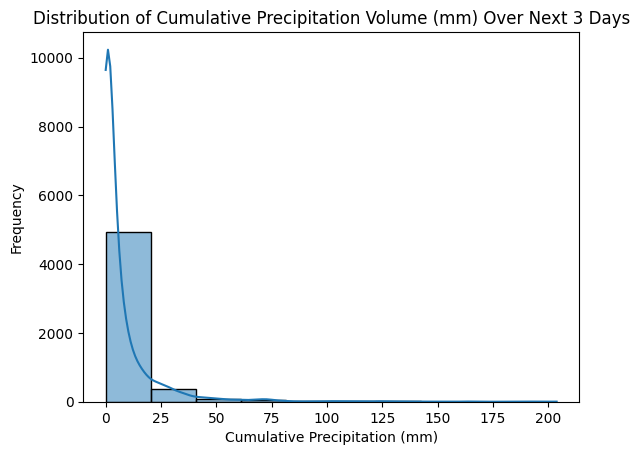

In [182]:
# Histogram + KDE plot for precipitation_fall
sns.histplot(df['precipitation_fall'], bins=10, kde=True)
plt.title('Distribution of Cumulative Precipitation Volume (mm) Over Next 3 Days')
plt.xlabel('Cumulative Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [183]:
# Create bins
bins = pd.cut(df['precipitation_fall'], bins=20)

# Create a frequency table by counting how many fall into each bin
freq_table = bins.value_counts().sort_index().reset_index()
freq_table.columns = ['Precipitation Range (mm)', 'Count']

# Calculate percentage of total for each bin
freq_table['Percentage (%)'] = (freq_table['Count'] / freq_table['Count'].sum()) * 100

# Display table
print(freq_table)

   Precipitation Range (mm)  Count  Percentage (%)
0          (-0.204, 10.185]   4387       80.113221
1           (10.185, 20.37]    540        9.861213
2           (20.37, 30.555]    258        4.711468
3           (30.555, 40.74]    111        2.027027
4           (40.74, 50.925]     59        1.077429
5           (50.925, 61.11]     34        0.620891
6           (61.11, 71.295]     27        0.493061
7           (71.295, 81.48]     25        0.456538
8           (81.48, 91.665]      6        0.109569
9          (91.665, 101.85]      5        0.091308
10        (101.85, 112.035]      6        0.109569
11        (112.035, 122.22]      3        0.054785
12        (122.22, 132.405]      7        0.127831
13        (132.405, 142.59]      2        0.036523
14        (142.59, 152.775]      1        0.018262
15        (152.775, 162.96]      1        0.018262
16        (162.96, 173.145]      1        0.018262
17        (173.145, 183.33]      0        0.000000
18        (183.33, 193.515]    

In [184]:
target_distribution_explanations = """Based on the summary statistics, approximately 75% of the observations correspond to a cumulative precipitation fall of up to 7.5 mm over the three-day period. Furthermore, around 80% of the data records cumulative precipitation volumes below 10 mm. This pronounced concentration of data points within the lower precipitation range indicates a significant class imbalance. Consequently, the predictive model may face challenges in accurately estimating higher precipitation volumes due to the limited availability of representative samples in those ranges."""

In [185]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `temperature_2m_mean `

In [186]:
df['temperature_2m_mean'].describe()

count    5476.000000
mean       17.529881
std         4.202891
min         7.439583
25%        13.964252
50%        17.624836
75%        20.945312
max        30.516668
Name: temperature_2m_mean, dtype: float64

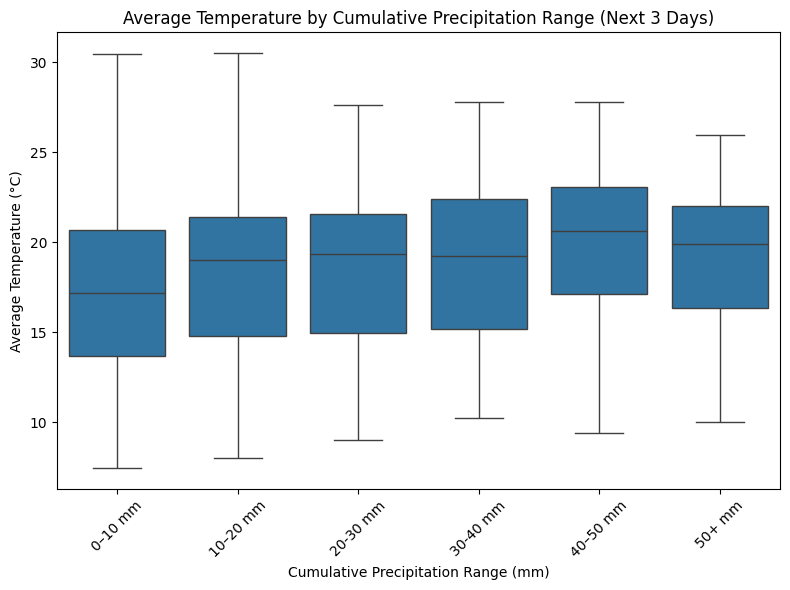

In [187]:
# Define bins for precipitation ranges
bins = [0, 10, 20, 30, 40, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–20 mm', '20-30 mm', '30-40 mm', '40–50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of average temperature by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='temperature_2m_mean', data=df)

plt.title('Average Temperature by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [188]:
feature_1_insights = """When precipitation fall is categorised into finer bins such as 0–10 mm, 10–20 mm, 20–30 mm, 30–40 mm, 40–50 mm and 50+ mm, the median average temperature tends to increase slightly as precipitation increases from 0 up to 50 mm. This suggests that warmer temperatures are generally associated with moderate increases in upcoming precipitation. However, this trend does not hold for the highest precipitation category (50+ mm), where the median temperature is noticeably lower than in the preceding bins. This deviation is also reflected in the maximum temperatures, with the highest precipitation category showing significantly lower maximum temperatures compared to all other groups. This pattern indicates that heavy precipitation events tend to suppress extreme temperature highs more effectively than lower precipitation ranges, which could be influenced by seasonal factors.
"""

In [189]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `relative_humidity_2m_mean`

In [190]:
df['relative_humidity_2m_mean'].describe()

count    5476.000000
mean       72.655853
std        10.852352
min        23.854151
25%        66.320295
50%        74.302994
75%        80.751511
max        95.974464
Name: relative_humidity_2m_mean, dtype: float64

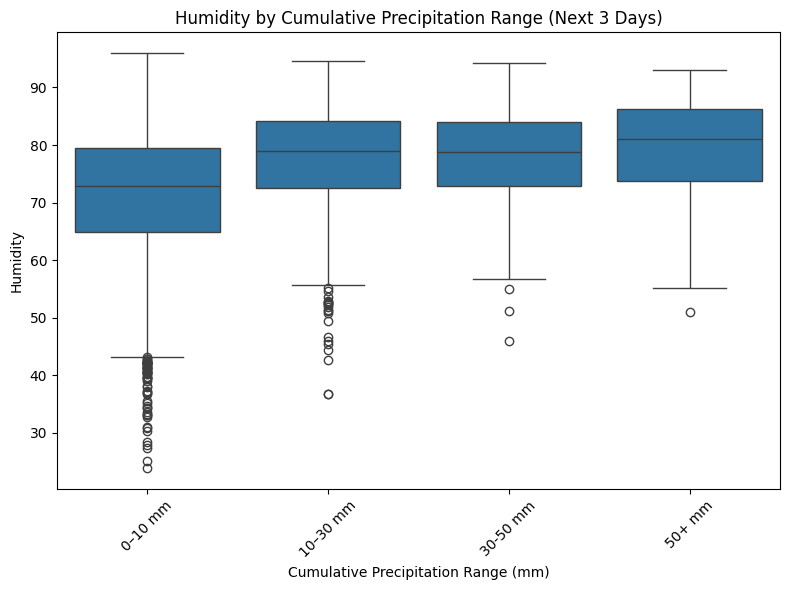

In [191]:
# Define bins for precipitation ranges
bins = [0, 10, 30, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–30 mm', '30-50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of humidity by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='relative_humidity_2m_mean', data=df)

plt.title('Humidity by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [192]:
feature_2_insights = """When precipitation fall is categorised into broader bins such as 0–10 mm, 10–30 mm, 30–50 mm and 50+ mm, distinct differences emerge in precipitation and humidity distributions. In the lowest precipitation category (0–10 mm), both the interquartile range and minimum humidity values are generally lower, with more data points concentrated at the lower end of the humidity scale, indicating drier conditions. As precipitation increases to higher categories, humidity tends to rise, showing higher median and interquartile range values. This suggests that greater upcoming precipitation is associated with higher ambient humidity levels.
"""

In [193]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `cloud_cover_mean `


In [194]:
df['cloud_cover_mean'].describe()

count    5476.000000
mean       48.337330
std        29.582575
min         0.000000
25%        23.989583
50%        47.791668
75%        72.135416
max       100.000000
Name: cloud_cover_mean, dtype: float64

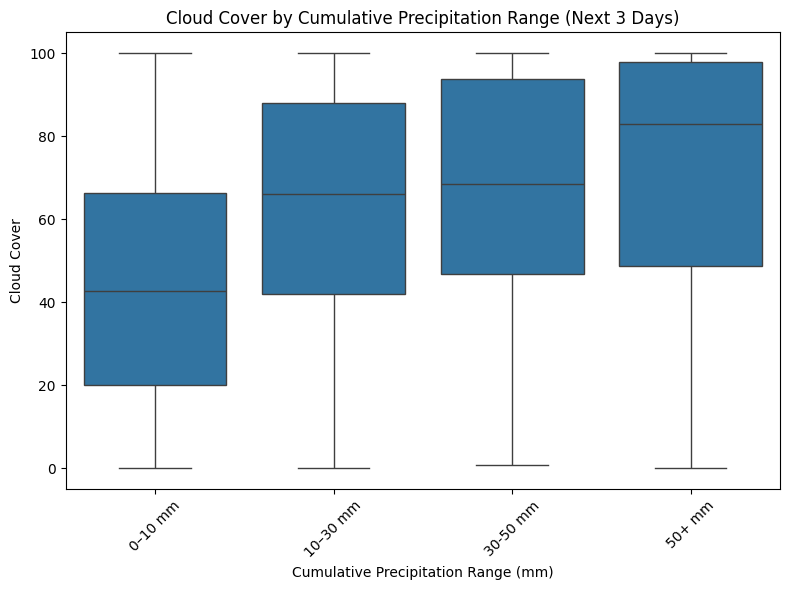

In [195]:
# Define bins for precipitation ranges
bins = [0, 10, 30, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–30 mm', '30-50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of cloud cover by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='cloud_cover_mean', data=df)

plt.title('Cloud Cover by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Cloud Cover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
feature_3_insights = """It is clear that cloud cover and precipitation fall have a relationship. Since most precipitation fall values are less than 10 mm, the interquartile range of cloud cover in this group is significantly lower than in the others. In contrast, for precipitation fall larger than 50 mm, cloud cover shows a notably higher median value. This indicates that heavier precipitation is generally associated with greater cloud cover.
"""

In [197]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

---
## D. Feature Selection


### D.1 Approach "Correlation Analysis"


In [198]:
df.drop(columns=['precip_bin'], inplace=True)

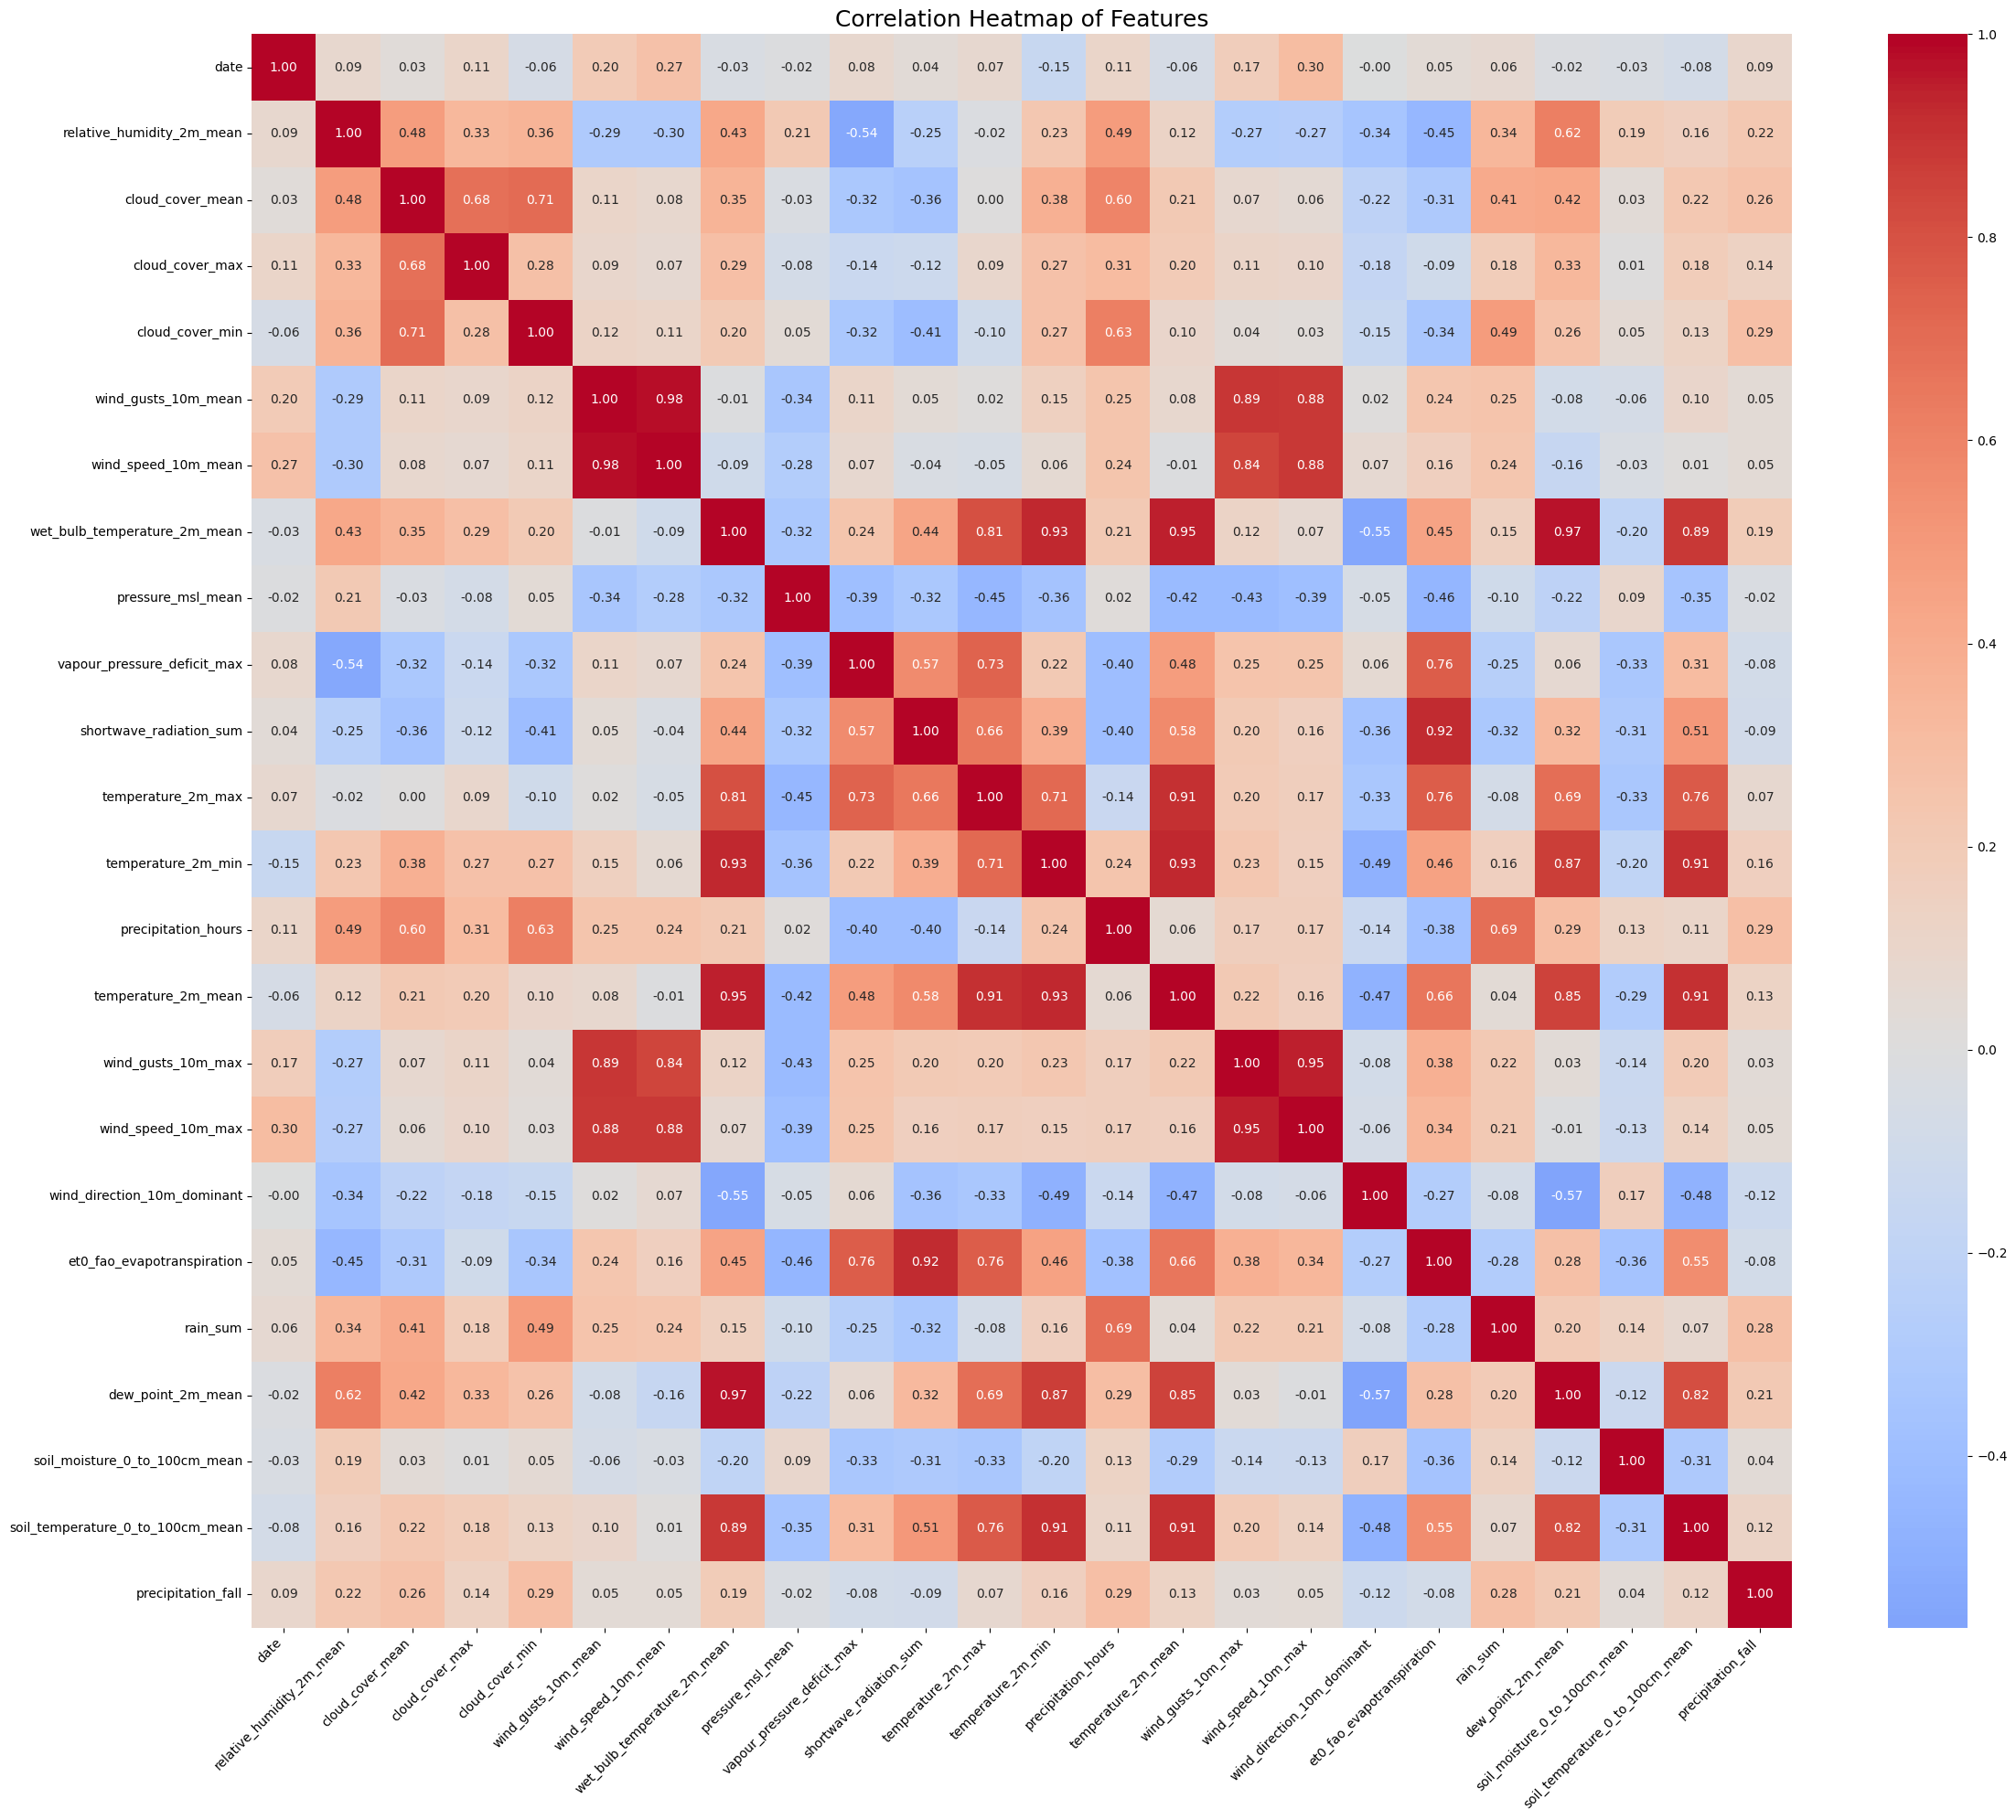

In [199]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(24, 20)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [200]:
feature_selection_1_insights = """From the correlation matrix, features such as relative_humidity_2m_mean, cloud_cover_mean, cloud_cover_min, precipitation_hours, rain_sum, and dew_point_2m_mean show correlations around 0.2 with the target variable, indicating they may have higher predictive value for the model. Although some multicollinearity is present among the features, all of them are retained for modeling because they were initially selected based on strong domain knowledge. Feature selection will later be performed using model-derived feature importance to identify the most relevant predictors.
"""

In [201]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## E. Data Preparation

In [202]:
df_clean = df.copy()
df_clean

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_sum,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean,precipitation_fall
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,20.643309,1011.920837,1.047818,...,22.964251,35.639999,18.581022,331.647491,2.459723,3.9,19.672583,0.120040,22.152273,10.300001
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,21.520597,1007.470764,1.030170,...,23.612165,37.439999,15.584300,298.610291,4.571662,8.6,20.716331,0.122225,22.497442,1.700000
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,16.673801,1015.529236,0.835103,...,19.882996,37.439999,18.345877,146.744644,2.140701,1.1,15.066335,0.123362,22.132751,0.600000
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,17.092829,1019.012390,0.959982,...,20.887167,37.439999,16.870138,69.884773,3.498662,0.6,15.185082,0.121697,21.884003,0.000000
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,19.079020,1015.891663,1.298432,...,22.520498,39.239998,17.477621,35.137077,5.620671,0.0,17.505919,0.118544,22.143875,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,13.132172,1011.550049,1.771306,...,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,8.020833,0.164935,23.129044,0.800000
5472,2024-12-24 14:00:00+00:00,64.223015,0.916667,8.0,0.0,27.209997,9.999595,16.614202,1015.845886,2.120138,...,21.368750,51.119999,20.690605,57.746136,6.146514,0.0,13.904166,0.163848,23.317209,1.700000
5473,2024-12-25 14:00:00+00:00,74.374580,13.125000,99.0,0.0,37.109997,15.707917,19.040123,1011.941711,1.703468,...,22.552084,62.639996,28.227304,37.269981,6.264203,0.0,17.331251,0.163165,23.522354,1.700000
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,19.730782,1003.516663,4.118773,...,26.202085,56.880001,24.012972,339.781250,6.296452,0.8,16.254166,0.162241,23.932188,1.200000


---
## F. Feature Engineering

### F.1 New Feature "wind_direction_10m_dominant"

In [203]:
#Statistics of wind_direction_10m_dominant
df_clean['wind_direction_10m_dominant'].describe()

count    5476.000000
mean      180.703430
std       103.379173
min         0.100736
25%        83.032665
50%       182.787415
75%       272.059395
max       359.857452
Name: wind_direction_10m_dominant, dtype: float64

In [204]:
# Convert degrees to radians
df_clean['wind_direction_rad'] = np.deg2rad(df_clean['wind_direction_10m_dominant'])

# Create sine and cosine components
df_clean['wind_direction_sin'] = np.sin(df_clean['wind_direction_rad'])
df_clean['wind_direction_cos'] = np.cos(df_clean['wind_direction_rad'])

# Drop wind_direction_10m_dominant and wind_direction_rad
df_clean.drop(columns=['wind_direction_10m_dominant', 'wind_direction_rad'], inplace=True)

In [205]:
feature_engineering_1_explanations = """The feature wind_direction_10m_dominant ranges from 0° to 360°, but its linear representation can mislead machine learning models, which may treat 0° and 360° as opposite directions. To address this, the angle is converted to radians and transformed into two continuous features using sine and cosine. This maps the data onto the unit circle, preserving its circular nature and enabling the model to better capture directional continuity for improved predictions.
"""

In [206]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Month"




In [207]:
df_clean['month'] = df_clean['date'].dt.month

In [208]:
feature_engineering_2_explanations = """Mapping the month from the date column is important because rainfall patterns often follow seasonal trends. Extracting the month captures these variations, which can improve predictive performance by enabling the model to make more informed distinctions based on seasonal context."""

In [209]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "Binary Lag Features (Rain Fall from the Past 3 Days)"

In [210]:
# Lag features for rain_sum for the past 3 days
df_clean['rain_sum_lag_1'] = df_clean['rain_sum'].shift(1)
df_clean['rain_sum_lag_2'] = df_clean['rain_sum'].shift(2)
df_clean['rain_sum_lag_3'] = df_clean['rain_sum'].shift(3)

In [211]:
df_clean.head()

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean,precipitation_fall,wind_direction_sin,wind_direction_cos,month,rain_sum_lag_1,rain_sum_lag_2,rain_sum_lag_3
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,20.643309,1011.920837,1.047818,...,19.672583,0.120040,22.152273,10.300001,-0.474895,0.880042,12,NaN,NaN,NaN
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,21.520597,1007.470764,1.030170,...,20.716331,0.122225,22.497442,1.700000,-0.877897,0.478850,1,3.9,NaN,NaN
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,16.673801,1015.529236,0.835103,...,15.066335,0.123362,22.132751,0.600000,0.548371,-0.836235,1,8.6,3.9,NaN
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,17.092829,1019.012390,0.959982,...,15.185082,0.121697,21.884003,0.000000,0.939003,0.343909,1,1.1,8.6,3.9
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,19.079020,1015.891663,1.298432,...,17.505919,0.118544,22.143875,0.500000,0.575535,0.817777,1,0.6,1.1,8.6


In [212]:
#Drop NaN values from lag columns
lag_cols = ['rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3']

df_clean = df_clean.dropna(subset=lag_cols).reset_index(drop=True)

In [213]:
df_clean.head()

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,vapour_pressure_deficit_max,...,dew_point_2m_mean,soil_moisture_0_to_100cm_mean,soil_temperature_0_to_100cm_mean,precipitation_fall,wind_direction_sin,wind_direction_cos,month,rain_sum_lag_1,rain_sum_lag_2,rain_sum_lag_3
0,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,17.092829,1019.012390,0.959982,...,15.185082,0.121697,21.884003,0.0,0.939003,0.343909,1,1.1,8.6,3.9
1,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,19.079020,1015.891663,1.298432,...,17.505919,0.118544,22.143875,0.5,0.575535,0.817777,1,0.6,1.1,8.6
2,2010-01-05 14:00:00+00:00,80.589897,30.083334,87.0,1.0,25.409998,10.476449,19.874550,1014.591614,0.878330,...,18.830915,0.115172,22.578459,0.5,0.528874,-0.848701,1,0.0,0.6,1.1
3,2010-01-06 14:00:00+00:00,70.297592,93.541664,100.0,69.0,25.184999,11.549491,17.563894,1017.795837,1.052439,...,15.664249,0.112614,22.495438,0.5,0.540901,-0.841087,1,0.0,0.0,0.6
4,2010-01-07 14:00:00+00:00,72.634361,61.416668,100.0,1.0,21.809998,9.444340,18.823814,1019.458313,1.116654,...,17.162165,0.110637,22.541067,0.0,0.945009,0.327043,1,0.0,0.0,0.0


In [214]:
feature_engineering_3_explanations = """Features such as rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3 are created to provide additional information about rainfall in the three days preceding a given date. These lagged variables offer the model contextual insight into recent precipitation patterns, enabling it to detect short-term trends or buildup conditions that may influence cumulative rainfall in the subsequent three-day period. By incorporating these historical rainfall indicators, the model is better positioned to capture the dynamics of short-term weather cycles, thereby enhancing its predictive accuracy.
"""

In [215]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### G.1 Split Datasets

In [216]:
# Create copies of df_clean for modeling
df_eng = df_clean.copy()

In [217]:
# Create splits based on date ranges
train_df = df_eng[df_eng['date'] < '2023-01-01']
val_df   = df_eng[(df_eng['date'] >= '2023-01-01') & (df_eng['date'] < '2024-01-01')]
test_df  = df_eng[df_eng['date'] >= '2024-01-01']

In [218]:
# Drop date column
train_df.drop(columns=['date'], inplace= True)
val_df.drop(columns=['date'], inplace= True)
test_df.drop(columns=['date'], inplace= True)

In [219]:
# Define the target variable and remove it
y_train = train_df.pop(target_name)
X_train = train_df

y_val = val_df.pop(target_name)
X_val = val_df

y_test = test_df.pop(target_name)
X_test = test_df

In [220]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(4746, 27)
(4746,)
(365, 27)
(365,)
(362, 27)
(362,)


In [221]:
data_splitting_explanations = """Given that precipitation forecasting is a time-series prediction task, the application of conventional data partitioning techniques such as random sampling or stratified sampling is inappropriate. These methods may introduce data leakage by allowing future observations to influence the training process, thereby compromising the validity of model evaluation. To preserve the temporal structure of the data and maintain the integrity of the modeling process, a chronological data-splitting strategy is employed. In this approach, data collected prior to the year 2023 is assigned to the training dataset, data from the full year of 2023 is used for validation, and data from the year 2024 is reserved for testing. This sequential partitioning reflects realistic forecasting scenarios, where models are trained exclusively on historical data and evaluated based on their ability to generalise to future, unseen conditions.
"""

In [222]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "Scaling"

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   relative_humidity_2m_mean         4746 non-null   float32
 1   cloud_cover_mean                  4746 non-null   float32
 2   cloud_cover_max                   4746 non-null   float32
 3   cloud_cover_min                   4746 non-null   float32
 4   wind_gusts_10m_mean               4746 non-null   float32
 5   wind_speed_10m_mean               4746 non-null   float32
 6   wet_bulb_temperature_2m_mean      4746 non-null   float32
 7   pressure_msl_mean                 4746 non-null   float32
 8   vapour_pressure_deficit_max       4746 non-null   float32
 9   shortwave_radiation_sum           4746 non-null   float32
 10  temperature_2m_max                4746 non-null   float32
 11  temperature_2m_min                4746 non-null   float32
 12  precipitati

In [225]:
scaler = StandardScaler().set_output(transform="pandas")

# Fit on training dataset
scaler.fit(X_train)

# Transform the numeric columns
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [226]:
data_transformation_1_explanations = """As all input variables are numerical, it is essential to scale them prior to modelling to ensure comparability across features. Standardising the input variables by transforming them to have a mean of zero and a standard deviation of one is a critical preprocessing step. This transformation enhances the performance of many machine learning algorithms, particularly those that are sensitive to the scale of input data, such as linear regression and support vector machines. Standardisation reduces the risk of features with larger magnitudes disproportionately influencing the model, thereby improving numerical stability, facilitating faster convergence during training, and supporting more accurate predictive outcomes.
"""

In [227]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [228]:
from pathlib import Path

# Create the path to the folder
path = Path.home() / "Desktop" / "36120"

In [229]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(path / 'X_train.csv', index=False)
  y_train.to_csv(path / 'y_train.csv', index=False)

  X_val.to_csv(path / 'X_val.csv', index=False)
  y_val.to_csv(path / 'y_val.csv', index=False)

  X_test.to_csv(path / 'X_test.csv', index=False)
  y_test.to_csv(path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

In [230]:
from sklearn.metrics import mean_squared_error, r2_score

In [231]:
performance_metrics_explanations = """Root Mean Squared Error (RMSE) and R squared (R²) are selected as the primary performance metrics for this project. RMSE is chosen because it shares the same units as the target variable, precipitation in millimeters, making the magnitude of errors straightforward and easy to interpret. Furthermore, RMSE penalises larger errors more heavily, which is crucial for accurately reflecting the impact of significant deviations in precipitation forecasts. R squared is included as it quantifies the proportion of variance in the observed data explained by the model, providing valuable insight into the overall goodness of fit and facilitating a comprehensive evaluation of model performance.
"""

In [232]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

In [233]:
from sklearn.dummy import DummyRegressor

In [234]:
# Initialise the dummy regressor
dummy = DummyRegressor(strategy='mean')

In [235]:
algorithm_selection_explanations = """The Dummy Regressor is selected as the baseline model to provide a reference point against which the performance of more advanced predictive models can be compared. This baseline helps to determine whether the more complex models capture meaningful patterns beyond simple heuristic predictions.
"""

In [236]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [237]:
hyperparameters_selection_explanations = """No hyperparameter tuning is performed for the Dummy Regressor since it serves solely as a baseline model.
"""

In [238]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [239]:
# Fit the model on the training dataset
dummy.fit(X_train, y_train)

DummyRegressor()

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [240]:
# Predictions on validation dataset
y_val_pred = dummy.predict(X_val)

In [241]:
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 11.07
R2: -0.00


In [242]:
# Predictions on testing dataset
y_test_pred = dummy.predict(X_test)

In [243]:
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 14.83
R2: -0.01


In [244]:
model_performance_explanations = """Since this is a baseline model, the RMSE serves as a benchmark that more advanced models must surpass to demonstrate predictive value. An observed negative R² score indicates that the baseline model explains the variance in the data worse than a simple mean prediction, highlighting its limited contribution. Therefore, any model that achieves a positive R² and a lower RMSE than the baseline can be considered to provide meaningful improvements.
"""

In [245]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [246]:
business_impacts_explanations = """This baseline model demonstrates negligible predictive capability, and its use in operational decision-making could result in substantial adverse consequences from a business standpoint due to its insufficient forecasting accuracy.
"""

In [247]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [248]:
experiment_results_explanations = """In subsequent experiments, models such as Linear Regression, Random Forest and ensemble-based methods will be explored. These models are selected for their ability to capture complex relationships and manage multicollinearity more effectively than the baseline. Where applicable, feature importance techniques will also be employed to assess and potentially enhance model performance through feature selection. These models are expected to outperform the baseline model, providing more accurate and reliable predictions of cumulative precipitation.
"""

In [249]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)